Sergio Adrian Martínez Tena

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Retorna True si el ultimo asiento esta disponible para el ultimo pasajero
# Retorna False si el ultimo asiento no esta disponible
def asientoDisponible(n,p,*,returnOrder=False):
    # Arreglo para saber que asientos estan ocupados
    asientosOcupados = [False for _ in range(n)]

    # Por cada uno de los pasajeros
    for k in range(1,n):
        # Volado con probabilidad de que el pasajero k se sentara en k
        # True: Le toca sentarse en k
        # False: No le toca sentarse en k
        volado = np.random.choice([True,False],1,p=[p,1-p])
        # Si volado es True y el asiento k esta disponible se sienta
        # Si el volado es falso o el asiento k no esta disponible
        # se va a sentar en cualquier lugar disponible
        if volado and asientosOcupados[k-1] == False:
            asientosOcupados[k-1] = k
        else:
            # Se elige cualquier asiento de los restantes (que no este ocupado y que no sea el de k)
            asientosRestantes = [asiento for asiento,ocupado in enumerate(asientosOcupados, start=1) 
                                 if not ocupado and asiento != k]
            # Se elige un asiento al azar de los restantes
            asiento = np.random.choice(asientosRestantes)
            # El pasajero ocupa el asiento
            asientosOcupados[asiento-1] = k
    
    # Busca el ultimo asiento desocupado y lo compara
    # con el ultimo pasajero
    ultimoAsientoDesocupado = asientosOcupados.index(False)
    if  ultimoAsientoDesocupado == n - 1:
        # Sienta al ultimo pasajero
        asientosOcupados[ultimoAsientoDesocupado] = n
        return asientosOcupados if returnOrder else True
    else:
        # Sienta al ultimo pasajero
        asientosOcupados[ultimoAsientoDesocupado] = n
        return asientosOcupados if returnOrder else False

In [3]:
# Regresa la probabilidad de que el ultimo asiento este libre para:
# n --> Numero de asientos y numero de pasajeros
# p --> con cierta probabilidad
def pUltimoAsientoLibre(n,p,*,trials=100, repetitions=10):
    p_sum = 0
    # Repite las pruebas para obtener un promedio de los resultados
    for _ in range(repetitions):
        ultimoAsientoLibre = 0
        # Realiza las pruebas n catidad de veces para obtener una probabilidad
        for trial in range(trials):
            # Obtiene si el ultimo asiento esta libre con n pasajeros/asientos
            # y cierta probabilidad p
            if asientoDisponible(n,p):
                # Cuenta la cantidad de veces que el asiento esta resulta libre
                ultimoAsientoLibre += 1
        # Obtiene la probabilidad de que el asiento este libre, dividiendo entre
        # el numero de pruebas y se van sumando
        p_sum += ultimoAsientoLibre/trials
    # Retorna el promedio de probabilidades
    return p_sum/repetitions

In [4]:
# Regresa el promedio de la cascada de cambios, si U no encuentra disponible su asiento.
def cambioDeAsientos(n,p,*,repeticiones):
    # Variables iniciales
    promedioCambios = 0
    # Realiza el procedimiento el numero de repeticiones 
    for _ in range(repeticiones):
        # Obtiene orden en el que se sentaron los pasajeros
        orden = asientoDisponible(n,p,returnOrder=True)
        # Inicializa los cambios en 0
        cambios = 0
        # Obtiene quien esta sentado en el ultimo asiento
        val = orden[-1]
        # Si el ultimo asiento no lo ocupa el ultimo pasajero
        # inicia la cascada de cambios (cada pasajero sentandose en donde debe)
        # hasta que ya no hay mas cambios
        while val != n:
            # Agrega un cambio
            cambios += 1
            # Obtiene el pasajero sentado en la posicion val-1
            val = orden[val-1]
        # Obtiene el promedio de cambios (segun el numero de repeticiones)
        promedioCambios += cambios/repeticiones
        
    return promedioCambios

**¿Cuál es la probabilidad de que U se siente en su asiento (en función de P)?**

In [12]:
probabilities = np.linspace(0,1,201)

results = []
for p in probabilities:
    u = pUltimoAsientoLibre(n=40,p=p, trials=100, repetitions=50)
    results.append(u)

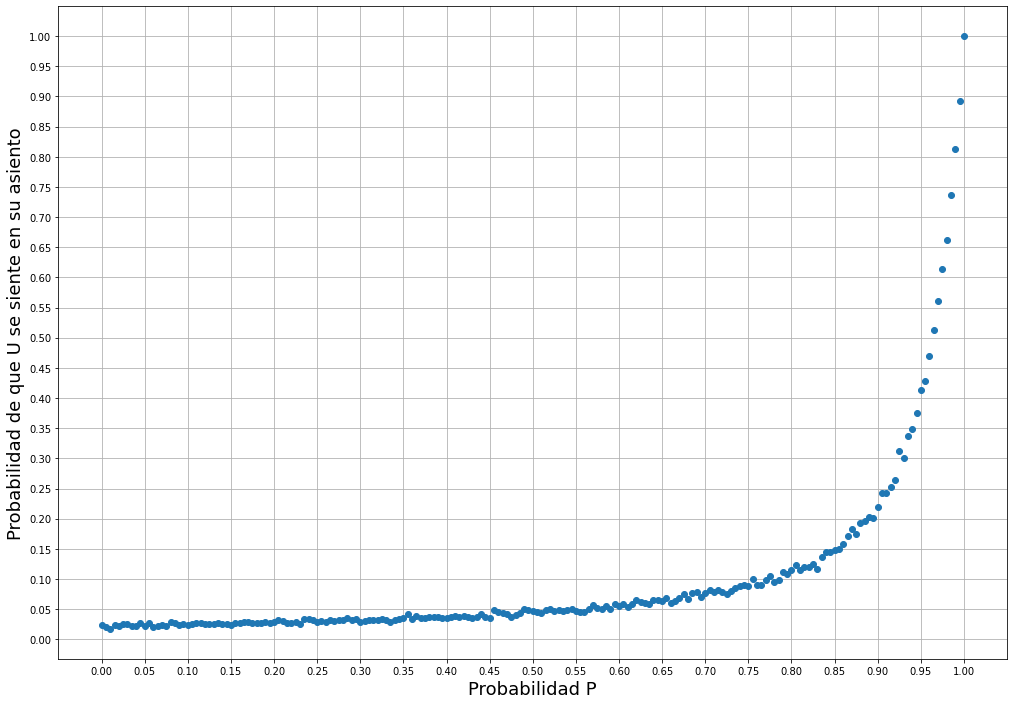

In [13]:
plt.figure(figsize=(17,12))
plt.plot(probabilities,results, 'o',linewidth=5)
plt.xticks(np.linspace(0,1,21))
plt.yticks(np.linspace(0,1,21))
plt.grid(True)
plt.xlabel('Probabilidad P', fontdict={'size':18})
plt.ylabel('Probabilidad de que U se siente en su asiento',fontdict={'size':18})
plt.show()

**Si U no encuentra disponible su asiento, ¿De qué tamaño es la cascada de cambios (Numero de cambios de asiento)?**

In [14]:
probabilities = np.linspace(0,1,201)

results = []
for p in probabilities:
    cambiosNecesarios = cambioDeAsientos(n=40,p=p, repeticiones=2000)
    results.append(cambiosNecesarios)

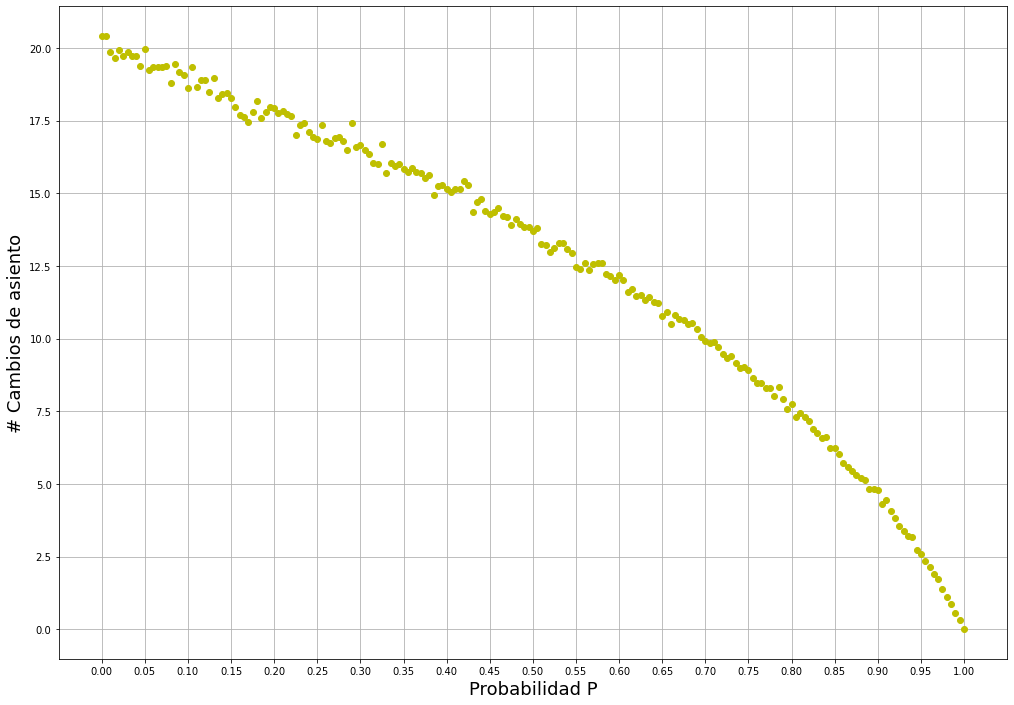

In [9]:
plt.figure(figsize=(17,12))
plt.plot(probabilities,results, 'yo',linewidth=5)
plt.xticks(np.linspace(0,1,21))
plt.grid(True)
plt.xlabel('Probabilidad P', fontdict={'size':18})
plt.ylabel('# Cambios de asiento',fontdict={'size':18})
plt.show()